## EDA 

### import the packages and data set

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/uber lyft price prediction/data set/final_dataset_1.csv")

In [ ]:
df.head()

,Unnamed: 0,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,...,max_travel_time,min_travel_time,avg_travel_time,merge_date,temp,clouds,pressure,rain,humidity,wind
0,0,1.45,Lyft,1545150004105,Back Bay,Northeastern University,1.0,b6c769b8-7a89-42d0-bf99-324ad9abae8d,lyft_line,Shared,...,14.0,5.0,9.5,Northeastern University - 2018-12-18 - 16,28.87,0.3,1011.5,0.0,0.46,14.46
1,1,4.17,Lyft,1545149713527,Financial District,Northeastern University,1.0,f6c9281c-bbb0-46d1-add7-1f6c72ff6b8f,lyft,Lyft,...,35.0,12.0,23.5,Northeastern University - 2018-12-18 - 16,28.87,0.3,1011.5,0.0,0.46,14.46
2,2,2.61,Uber,1545152108275,Beacon Hill,Northeastern University,1.0,00825834-c0ed-45b3-9482-cb10e6fbbfb0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,20.0,9.0,14.5,Northeastern University - 2018-12-18 - 16,28.87,0.3,1011.5,0.0,0.46,14.46
3,3,2.41,Lyft,1545151204098,Beacon Hill,Northeastern University,1.0,be9279d1-8db6-4981-8ae2-15bff1d8ca20,lyft_premier,Lux,...,20.0,8.0,14.0,Northeastern University - 2018-12-18 - 16,28.87,0.3,1011.5,0.0,0.46,14.46
4,4,1.45,Lyft,1545150004105,Back Bay,Northeastern University,1.0,b6c769b8-7a89-42d0-bf99-324ad9abae8d,lyft_line,Shared,...,14.0,5.0,9.5,Northeastern University - 2018-12-18 - 16,28.87,0.3,1011.5,0.0,0.46,14.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293164 entries, 0 to 293163
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        293164 non-null  int64  
 1   distance          293164 non-null  float64
 2   cab_type          293164 non-null  object 
 3   time_stamp        293164 non-null  int64  
 4   destination       293164 non-null  object 
 5   source            293164 non-null  object 
 6   surge_multiplier  293164 non-null  float64
 7   id                293164 non-null  object 
 8   product_id        293164 non-null  object 
 9   name              293164 non-null  object 
 10  date_time         293164 non-null  object 
 11  date              293164 non-null  object 
 12  day               293164 non-null  int64  
 13  hour              293164 non-null  int64  
 14  fare_per_mile     293164 non-null  float64
 15  class_hour        293164 non-null  int64  
 16  Price             29

In [ ]:
df["cab_type"].unique()

array(['Lyft', 'Uber'], dtype=object)

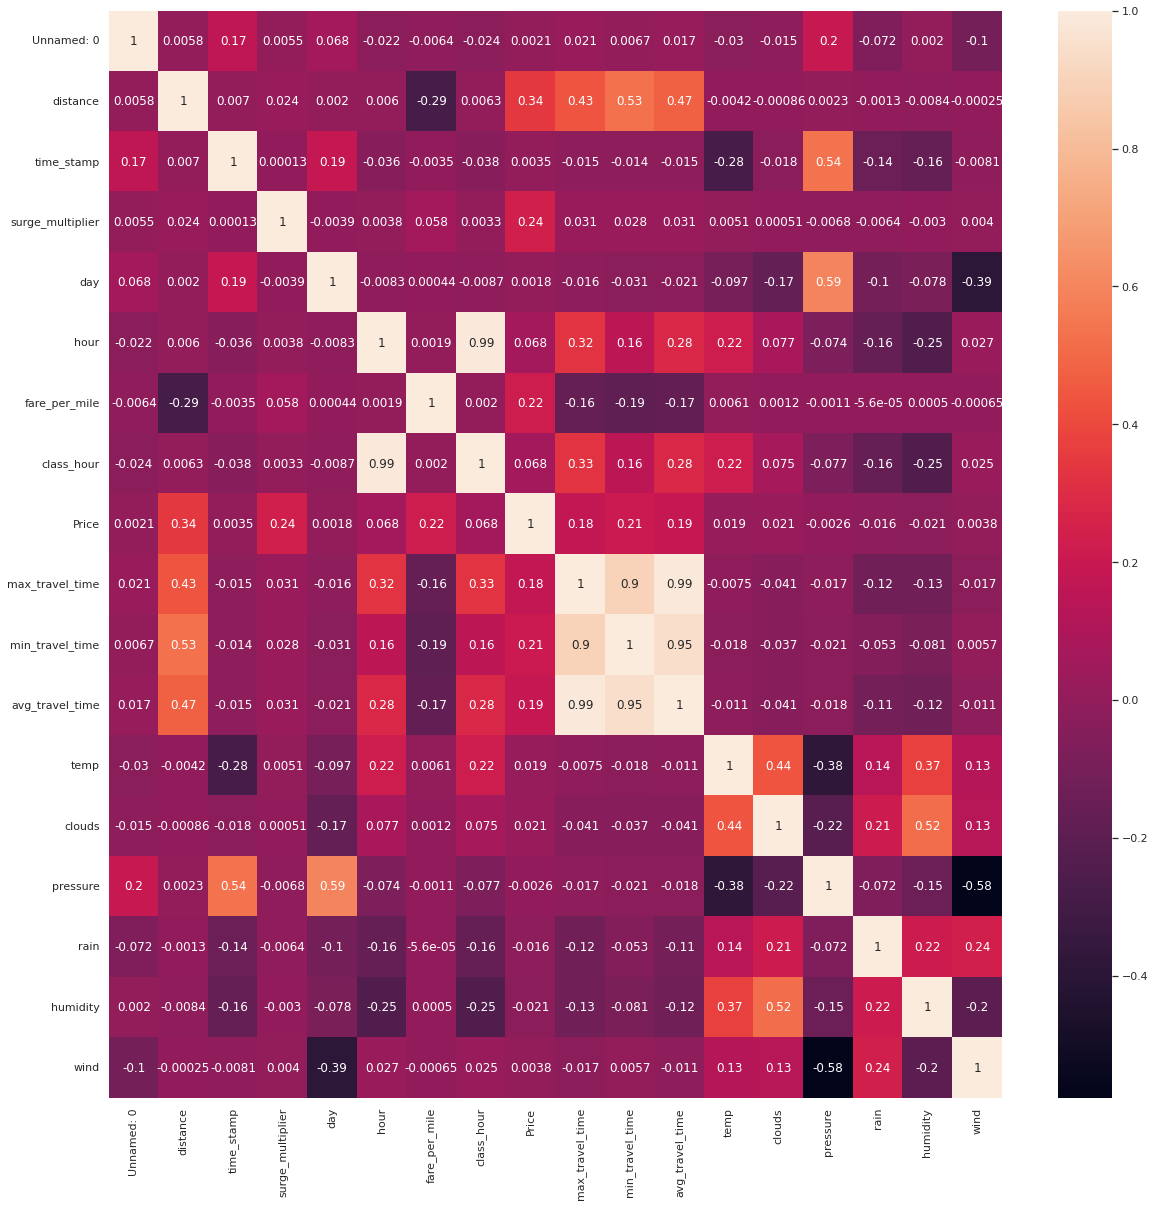

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr() ,annot=True)

## split the data set into uber and lyft

In [ ]:
df_uber = df[df['cab_type'] == "Uber"]
df_lyft = df[df['cab_type'] == "Lyft"]

In [ ]:
# df_uber.drop(["Unnamed: 0"] , axis=1 , inplace=True)
# df_uber.reset_index(inplace=True)
df_uber.drop(["level_0"] , axis=1 , inplace=True)


df_lyft.drop(["Unnamed: 0"] , axis=1 , inplace=True)
# # df_lyft.reset_index(inplace=True)
# df_lyft.drop(["level_0"] , axis=1 , inplace=True)


KeyError: ignored

In [ ]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151136 entries, 2 to 293163
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        151136 non-null  int64  
 1   distance          151136 non-null  float64
 2   cab_type          151136 non-null  object 
 3   time_stamp        151136 non-null  int64  
 4   destination       151136 non-null  object 
 5   source            151136 non-null  object 
 6   surge_multiplier  151136 non-null  float64
 7   id                151136 non-null  object 
 8   product_id        151136 non-null  object 
 9   name              151136 non-null  object 
 10  date_time         151136 non-null  object 
 11  date              151136 non-null  object 
 12  day               151136 non-null  int64  
 13  hour              151136 non-null  int64  
 14  fare_per_mile     151136 non-null  float64
 15  class_hour        151136 non-null  int64  
 16  Price             15

In [ ]:
df_lyft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142028 entries, 0 to 293160
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        142028 non-null  int64  
 1   distance          142028 non-null  float64
 2   cab_type          142028 non-null  object 
 3   time_stamp        142028 non-null  int64  
 4   destination       142028 non-null  object 
 5   source            142028 non-null  object 
 6   surge_multiplier  142028 non-null  float64
 7   id                142028 non-null  object 
 8   product_id        142028 non-null  object 
 9   name              142028 non-null  object 
 10  date_time         142028 non-null  object 
 11  date              142028 non-null  object 
 12  day               142028 non-null  int64  
 13  hour              142028 non-null  int64  
 14  fare_per_mile     142028 non-null  float64
 15  class_hour        142028 non-null  int64  
 16  Price             14

## univariant

## count for every one

### destination count for uber and lyft

[Text(0, 0, 'Back Bay'),
 Text(0, 0, 'Financial District'),
 Text(0, 0, 'Beacon Hill'),
 Text(0, 0, 'West End'),
 Text(0, 0, 'Theatre District'),
 Text(0, 0, 'North Station'),
 Text(0, 0, 'Haymarket Square'),
 Text(0, 0, 'Northeastern University'),
 Text(0, 0, 'South Station'),
 Text(0, 0, 'Boston University'),
 Text(0, 0, 'Fenway'),
 Text(0, 0, 'North End')]

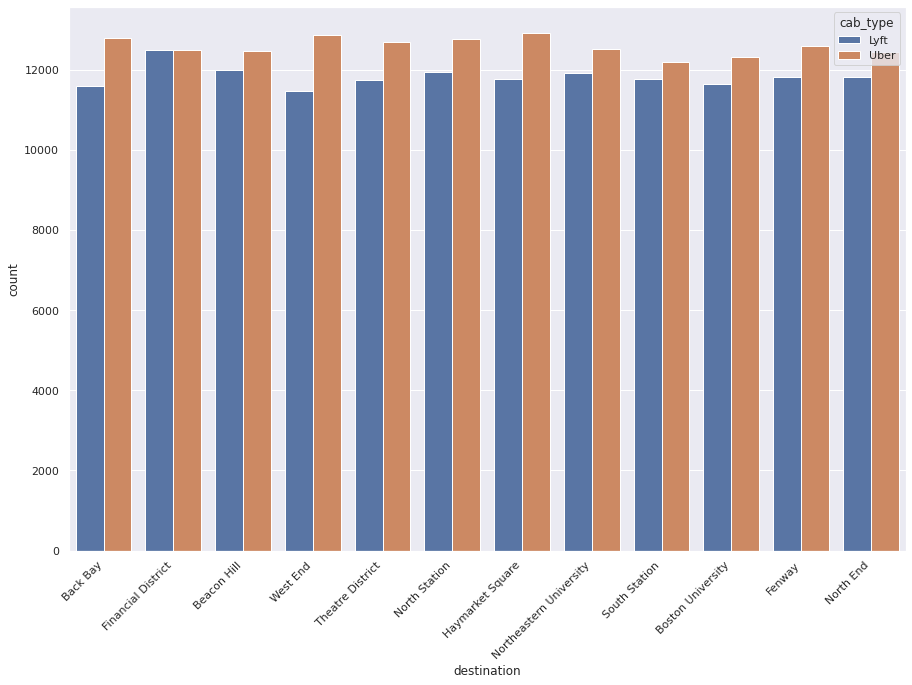

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
chart = sns.countplot(data = df
            ,x = 'destination'
            ,hue = 'cab_type'
            )
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)

### source count of uber and lyft

[Text(0, 0, 'Northeastern University'),
 Text(0, 0, 'Haymarket Square'),
 Text(0, 0, 'Boston University'),
 Text(0, 0, 'North Station'),
 Text(0, 0, 'West End'),
 Text(0, 0, 'Financial District'),
 Text(0, 0, 'South Station'),
 Text(0, 0, 'North End'),
 Text(0, 0, 'Back Bay'),
 Text(0, 0, 'Fenway'),
 Text(0, 0, 'Theatre District'),
 Text(0, 0, 'Beacon Hill')]

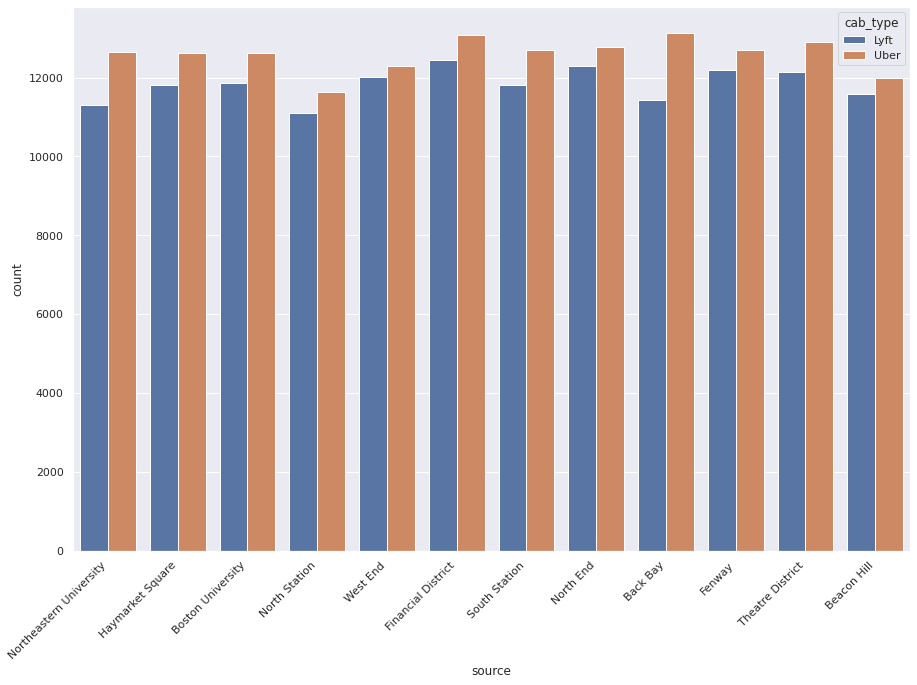

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
chart = sns.countplot(data = df
            ,x = 'source'
            ,hue = 'cab_type'
            )
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45, 
    horizontalalignment='right',
    fontweight='light' 
)

### name count of uber and lyft

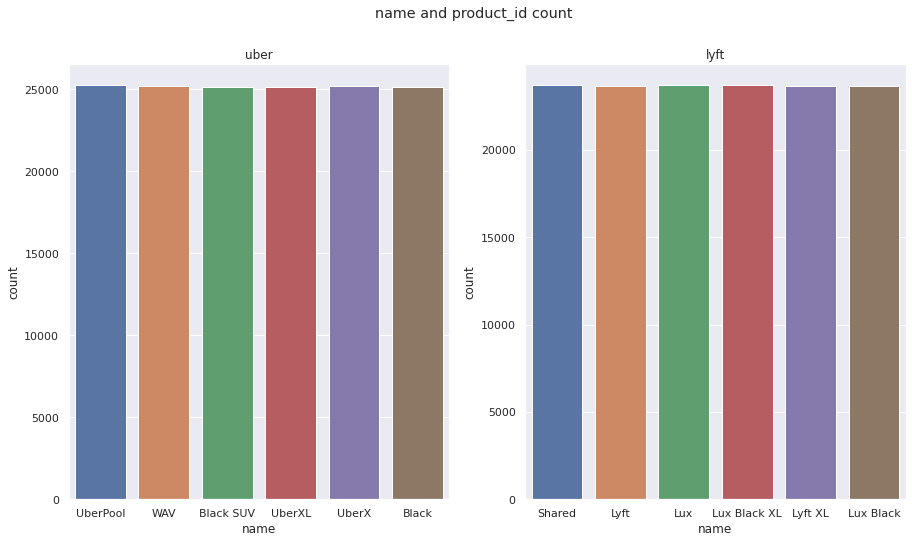

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
figure, axes = plt.subplots(1, 2)
figure.suptitle('name and product_id count')
axes[0].set_title('uber')
axes[1].set_title('lyft')
sns.countplot(data = df_uber, x="name", ax=axes[0])
sns.countplot(data = df_lyft, x="name", ax=axes[1])

### surger multiplier of uber and lyft

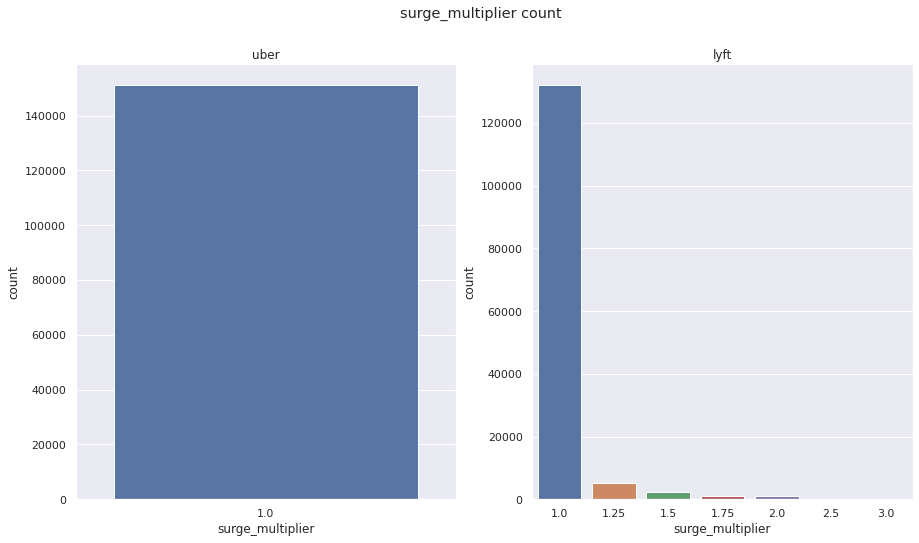

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
figure, axes = plt.subplots(1, 2)
figure.suptitle('surge_multiplier count')
axes[0].set_title('uber')
axes[1].set_title('lyft')
sns.countplot(data = df_uber, x="surge_multiplier", ax=axes[0])
sns.countplot(data = df_lyft, x="surge_multiplier", ax=axes[1])

### class hour count for uber and lyft

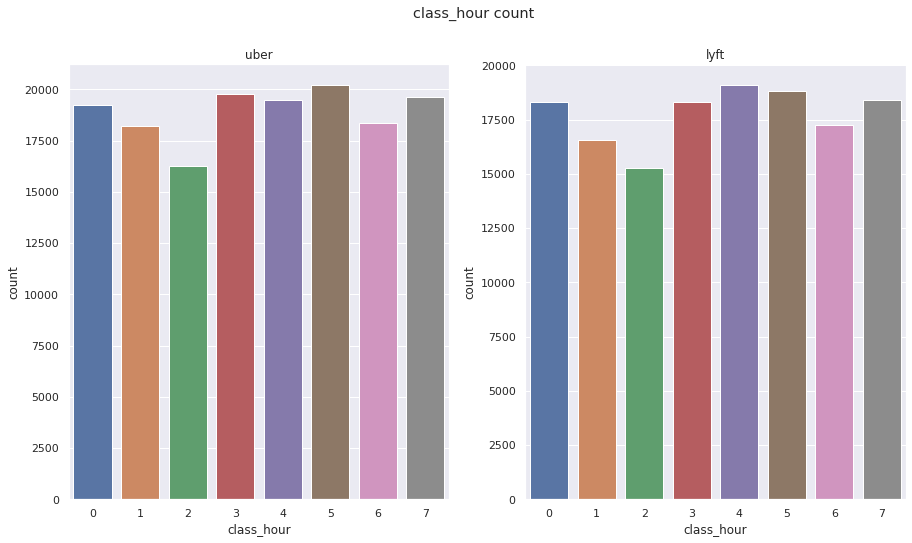

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
figure, axes = plt.subplots(1, 2)
figure.suptitle('class_hour count')
axes[0].set_title('uber')
axes[1].set_title('lyft')
sns.countplot(data = df_uber, x="class_hour", ax=axes[0])
sns.countplot(data = df_lyft, x="class_hour", ax=axes[1])

 ## univariant but continusous

### for the distance

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


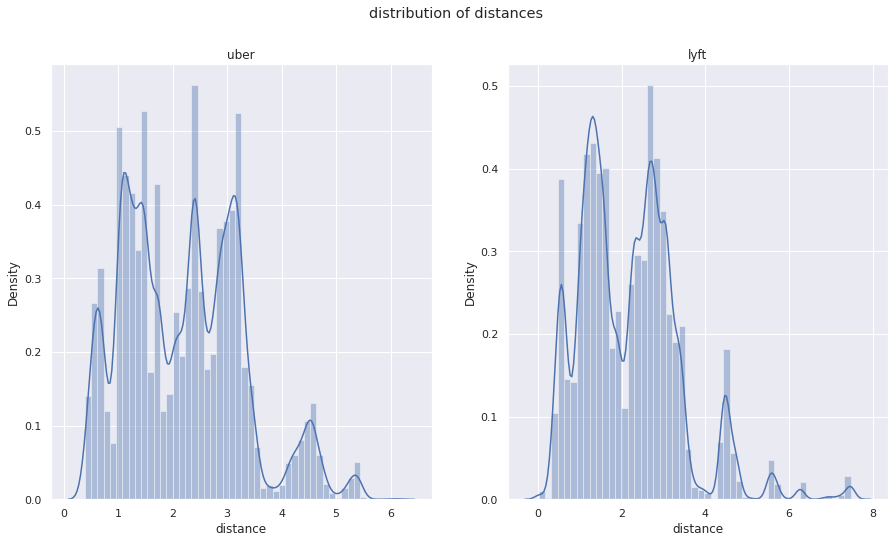

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
figure, axes = plt.subplots(1, 2)
figure.suptitle('distribution of distances')
axes[0].set_title('uber')
axes[1].set_title('lyft')
sns.distplot(df_lyft['distance'], kde=True, ax=axes[0])
sns.distplot(df_uber['distance'], kde=True, ax=axes[1])


### for the price

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


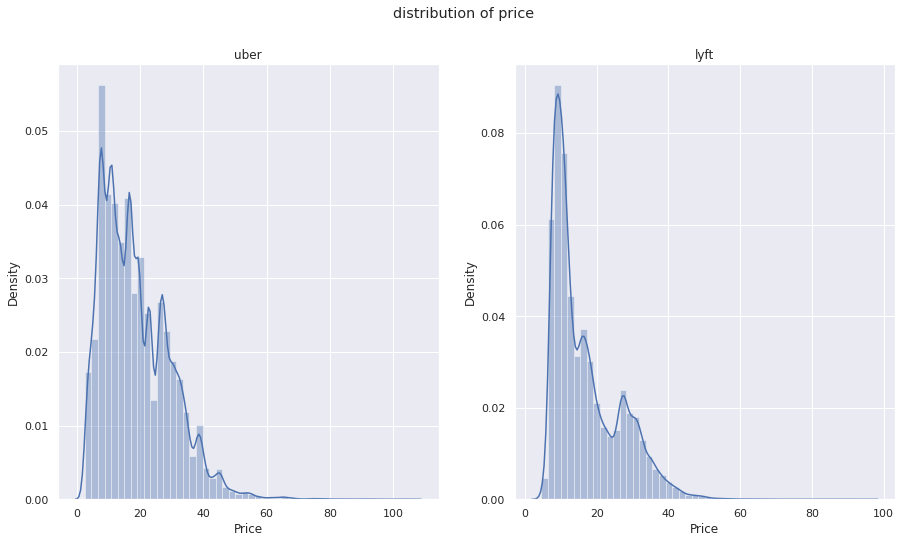

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
figure, axes = plt.subplots(1, 2)
figure.suptitle('distribution of price')
axes[0].set_title('uber')
axes[1].set_title('lyft')
sns.distplot(df_lyft['Price'], kde=True, ax=axes[0])
sns.distplot(df_uber['Price'], kde=True, ax=axes[1])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


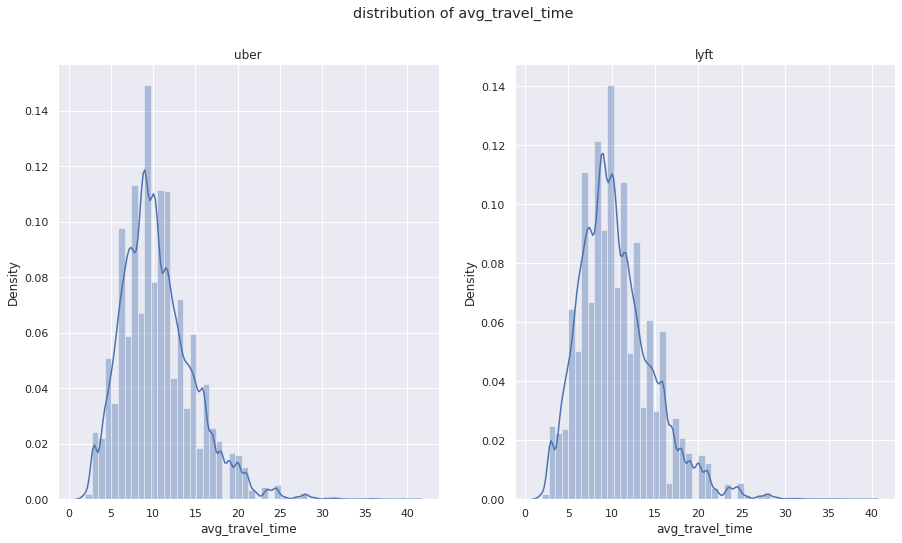

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
figure, axes = plt.subplots(1, 2)
figure.suptitle('distribution of avg_travel_time')
axes[0].set_title('uber')
axes[1].set_title('lyft')
sns.distplot(df_lyft['avg_travel_time'], kde=True, ax=axes[0])
sns.distplot(df_uber['avg_travel_time'], kde=True, ax=axes[1])


In [ ]:
x = df["distance"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293164 entries, 0 to 293163
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        293164 non-null  int64  
 1   distance          293164 non-null  float64
 2   cab_type          293164 non-null  object 
 3   time_stamp        293164 non-null  int64  
 4   destination       293164 non-null  object 
 5   source            293164 non-null  object 
 6   surge_multiplier  293164 non-null  float64
 7   id                293164 non-null  object 
 8   product_id        293164 non-null  object 
 9   name              293164 non-null  object 
 10  date_time         293164 non-null  object 
 11  date              293164 non-null  object 
 12  day               293164 non-null  int64  
 13  hour              293164 non-null  int64  
 14  fare_per_mile     293164 non-null  float64
 15  class_hour        293164 non-null  int64  
 16  Price             29

In [ ]:
from sklearn import preprocessing

  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['name']= label_encoder.fit_transform(df['name'])
  
df['name'].unique()


array([ 7,  5,  8,  2, 11,  4,  1, 10,  6,  9,  0,  3])

In [ ]:
x = df[['distance' , 'cab_type' , 'destination' , 'source' , 'surge_multiplier' , 'name' , 'max_travel_time']]

In [ ]:
x

,distance,cab_type,destination,source,surge_multiplier,name,max_travel_time
0,1.45,0,0,8,0,7,14.0
1,4.17,0,4,8,0,5,35.0
2,2.61,1,1,8,0,8,20.0
3,2.41,0,1,8,0,2,20.0
4,1.45,0,0,8,0,7,14.0
...,...,...,...,...,...,...,...
293159,2.30,0,2,1,0,7,4.0
293160,2.30,0,2,1,0,2,4.0
293161,2.19,1,6,1,0,0,12.0
293162,2.19,1,6,1,0,9,12.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

            feature       VIF
0          distance  5.259349
1          cab_type  2.246099
2       destination  2.923210
3            source  2.816317
4  surge_multiplier  1.050742
5              name  3.429203
6   max_travel_time  6.597008
